In [214]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

In [203]:
a = 4
b = -3
c = -2
d = 3

In [204]:
x_train = np.random.uniform(-1, 1, 1000) 
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a+b*x_valid+c*x_valid*x_valid+d*x_valid*x_valid*x_valid

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a+b*x_train+c*x_train*x_train+d*x_train*x_train*x_train, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a+b*x_valid+c*x_valid*x_valid+d*x_valid*x_valid*x_valid, sigma)

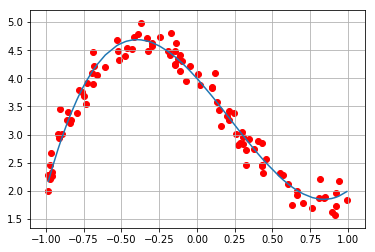

In [205]:
# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
#plt.scatter(x_train, y_train, color='g')
plt.grid(True); plt.show()

In [206]:
# compose the NN model
model = tf.keras.Sequential()
#model.add(Dense(1, input_shape=(1,))) #ho una sola ascissa come input
model.add(Dense(15, input_shape=(1,), activation='softplus'))
model.add(Dense(10, activation="hard_sigmoid"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="tanh"))
model.add(Dense(15,  activation='sigmoid'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #ho un solo layer con un neurone
#mse=nean square error
#in questo caso semplice, ha tutto per poter lavorare

In [207]:
# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_83 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_84 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_85 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_86 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 16        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [215]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=[x_train,y_train],y=y_train, 
          batch_size=32, epochs=500,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=([x_valid, y_valid], z_valid))

NameError: name 'z_valid' is not defined

In [209]:
# get a summary of our composed model
from tensorflow.keras.models import load_model
save_model_path='Modelli_2/Modello_5.mod'
model.save(filepath=save_model_path, include_optimizer=True)

In [210]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 0s 330us/sample - loss: 0.0395 - mean_squared_error: 0.0395

Test loss: 0.03954131320118904
Test accuracy: 0.039541315


In [211]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 0s 1ms/sample - loss: 0.0014 - mean_squared_error: 0.0014

Test loss: 0.0014146728347986936
Test accuracy: 0.0014146729


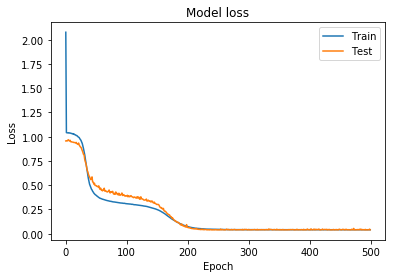

In [212]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

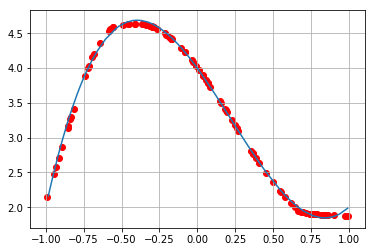

In [213]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()